In [4]:
import pandas as pd
import numpy as np
import os
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import sys
from PIL import Image

In [5]:
quantified_directory = '/home/mass_spec_img/mass_spec_img/data/quantified'
df = pd.DataFrame()
y_max = 0
slide_names = ['SQ1631', 'SQ1632', 'SQ1633', 'SQ1634', 'SQ1635', 'SQ1636']
tissue_names = ['S1', 'S2', 'S3', 'S4']
for s in slide_names:
    slide_df = pd.DataFrame()
    for t in tissue_names:
        st = s+t+"_quantified.tsv"
        sub_df = pd.read_csv(os.path.join(quantified_directory, st), sep="\t")
        scaler = MinMaxScaler()
        for column in sub_df.columns[2:]:
            sub_df[column] = scaler.fit_transform(sub_df[[column]])
        data = sub_df.iloc[:, 2:]
        pca = PCA(n_components=3)
        data = pd.DataFrame(pca.fit_transform(data))
        sub_df = pd.concat([sub_df.iloc[:, :2], data], axis=1)
        slide_df = pd.concat([slide_df, sub_df], axis=0)
    slide_df['Y'] += y_max
    y_max = slide_df['Y'].max()
    df = pd.concat([df, slide_df], axis=0)
df.to_csv("/home/mass_spec_img/mass_spec_img/data/quantified/SQ1631_1636_PCA.tsv", sep="\t", index=False)




In [38]:
df.head()

X    Y         0         1         2
0  1331  589 -0.044182  0.223830 -0.037054
1  1332  589 -0.165323  0.399423 -0.117871
2  1333  589 -0.012094  0.275549 -0.104993
3  1334  589 -0.037767  0.315772 -0.070170
4  1335  589 -0.110412  0.269601 -0.131417

In [39]:
data = df.iloc[:, 2:]
# get the coordinates of the pixels for the output image
xmin, xmax = df['X'].min(), df['X'].max()
ymin, ymax = df['Y'].min(), df['Y'].max()
df['X'] -= xmin
df['Y'] -= ymin

width = xmax - xmin + 1
height = ymax - ymin + 1
data.head()

0         1         2
0 -0.044182  0.223830 -0.037054
1 -0.165323  0.399423 -0.117871
2 -0.012094  0.275549 -0.104993
3 -0.037767  0.315772 -0.070170
4 -0.110412  0.269601 -0.131417

In [40]:
for i in range(data.shape[1]):
    v = data.iloc[:, i]
    data.iloc[:, i] = (v - v.min()) / (v.max() - v.min())
img = Image.new('RGB', (width, height), color='black')


red_color = np.array((255, 0, 0))
cred_color = np.array((0, 255, 255))
green_color = np.array((0, 255, 0))
cgreen_color = np.array((255, 0, 255))
blue_color = np.array((0, 0, 255))
cblue_color = np.array((255, 255, 0))

xp = 1

for r in range(data.shape[0]):
    the_color = np.zeros(3)
    i = 0
    rval = (data.iloc[r,i] - 0.5) / 0.5
    if rval > 0:
        the_color += rval * red_color
    else:
        the_color += (-1 * rval) * cred_color
    i = 1
    gval = (data.iloc[r,i] - 0.5) / 0.5
    if gval > 0:
        the_color += gval * green_color
    else:
        the_color += (-1 * gval) * cgreen_color
    i = 2
    bval = (data.iloc[r,i] - 0.5) / 0.5
    if bval > 0:
        the_color += bval * blue_color
    else:
        the_color += (-1 * bval) * cblue_color

    the_color /= (255 * 3)
    the_color *= 255
    for i in range(xp):
        for j in range(xp):
            img.putpixel((df.iloc[r,0]*xp + i,df.iloc[r,1]*xp + j), tuple(np.int32(the_color)))

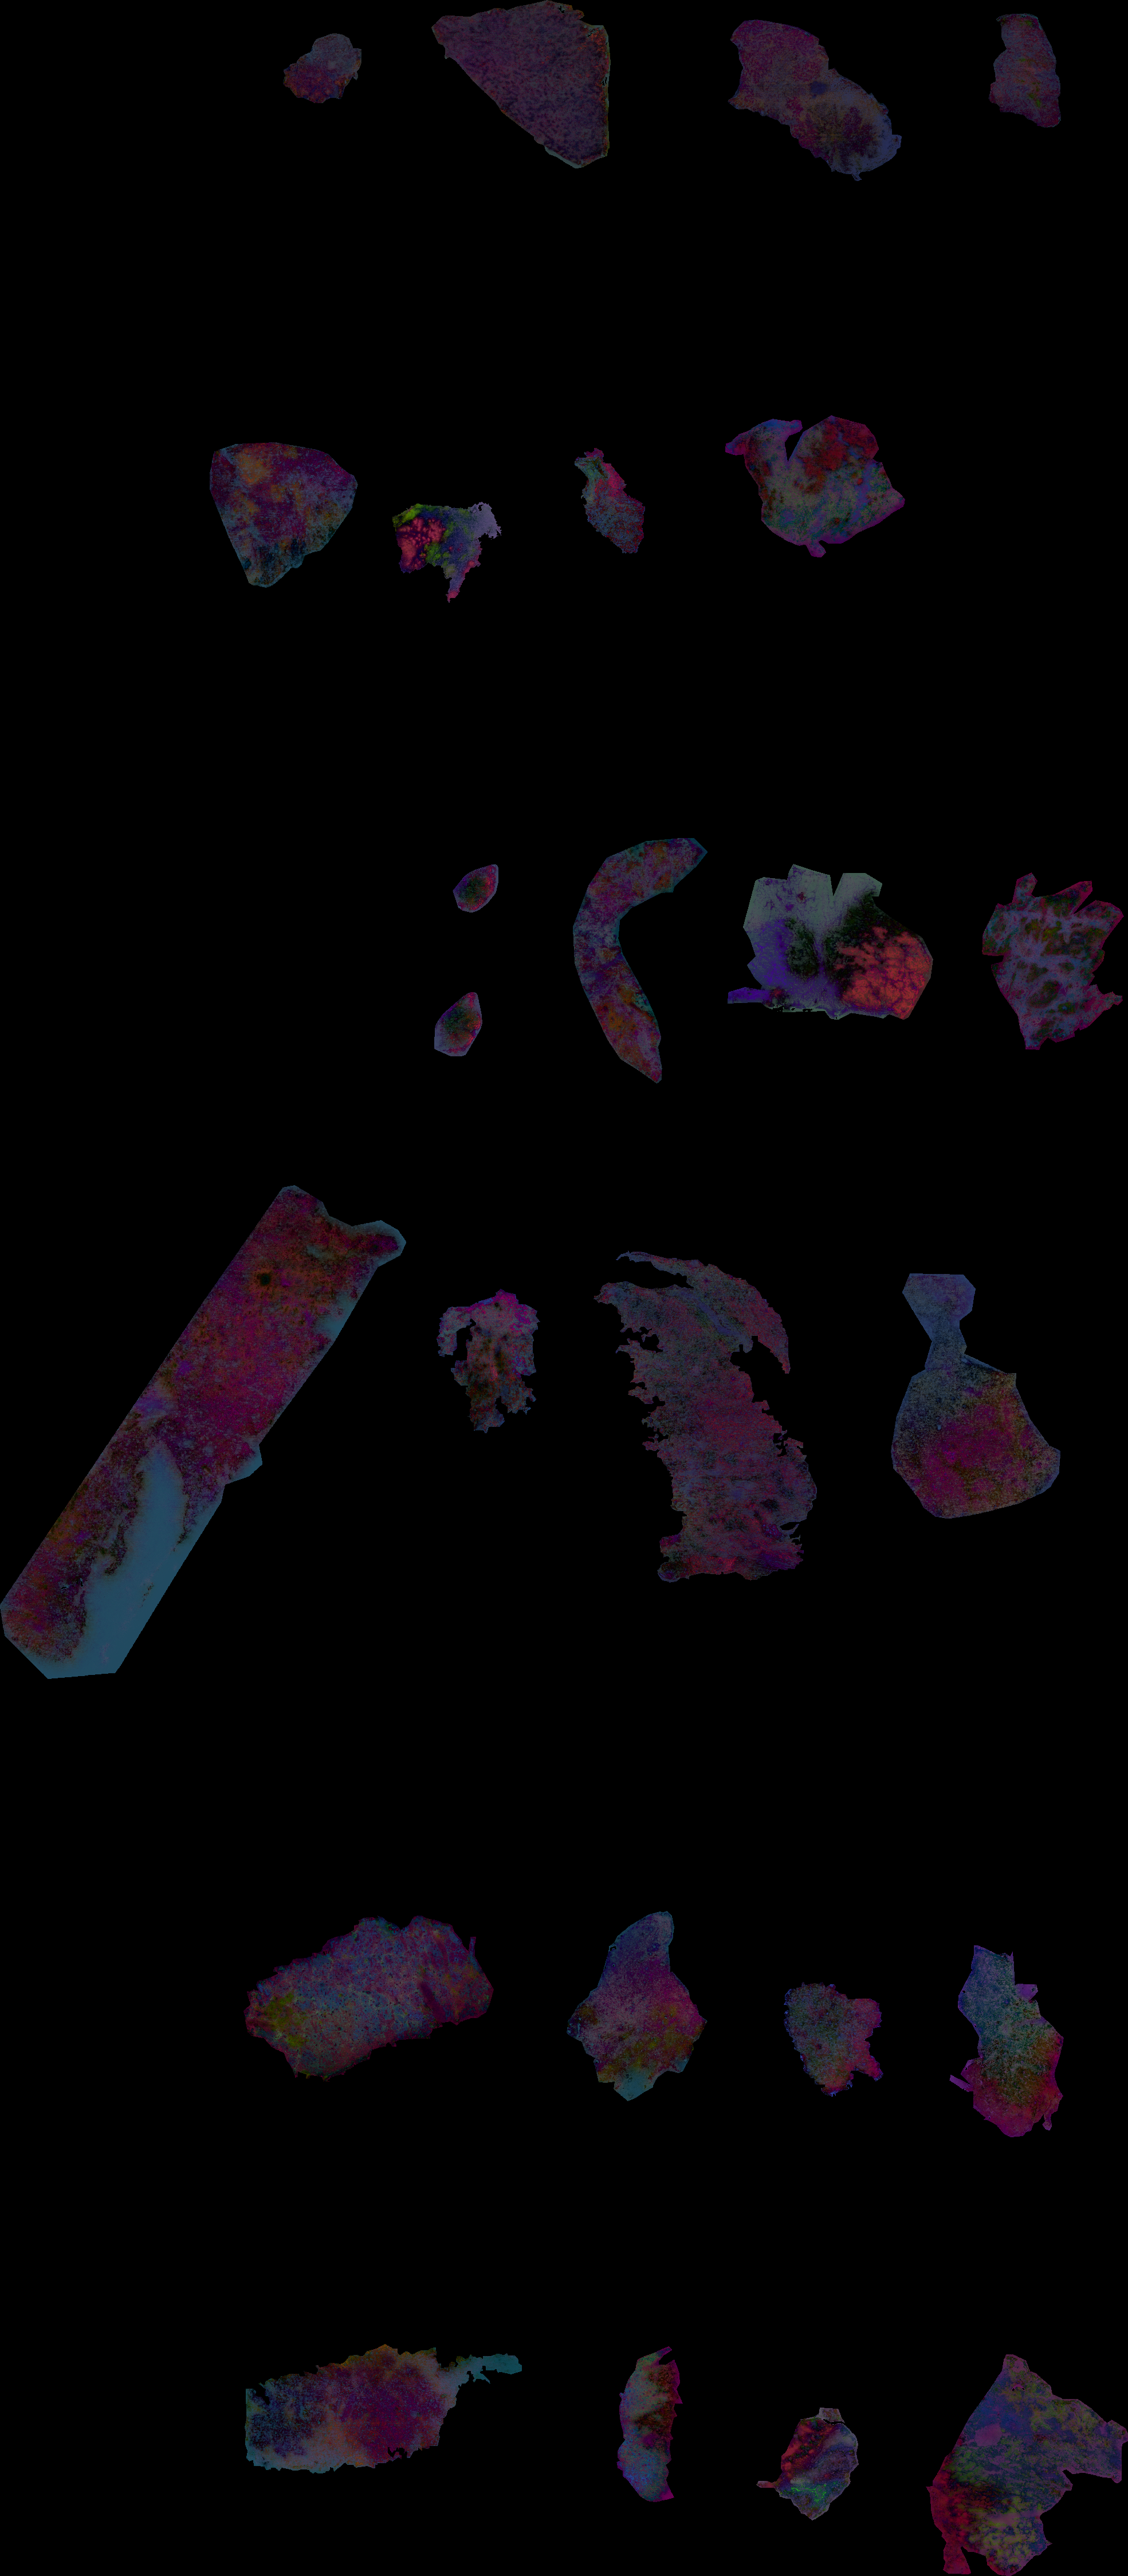

In [41]:
display(img)

In [6]:
pca_df = pd.read_csv("/home/mass_spec_img/mass_spec_img/data/quantified/SQ1631_1636_PCA.tsv", sep="\t")
pca_df

X     Y         0         1         2
0        1331   589 -0.044182  0.223832 -0.037053
1        1332   589 -0.165323  0.399418 -0.117881
2        1333   589 -0.012094  0.275551 -0.105002
3        1334   589 -0.037767  0.315769 -0.070172
4        1335   589 -0.110412  0.269603 -0.131414
...       ...   ...       ...       ...       ...
1225442  2511  5027  0.297437 -1.000779 -0.074632
1225443  2512  5027  0.367500 -0.795350 -0.033032
1225444  2513  5027  0.361756 -0.959333 -0.055270
1225445  2514  5027  0.374473 -0.837578 -0.031802
1225446  2515  5027  0.309004 -0.987271 -0.095734

[1225447 rows x 5 columns]